# Imports

In [15]:
%load_ext autoreload
from helper import *
%autoreload
%aimport helper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [2]:
df = pd.read_csv('dataset_management\data\clean\clean.csv', parse_dates=['Timestamp'])

In [3]:
df.columns

Index(['Timestamp', 'DK_1_imports', 'SE_4_imports', 'DK_1_exports',
       'SE_4_exports', 'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load',
       'Solar_[MW]', 'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total'],
      dtype='object')

In [4]:
df.isna().sum().sum()

0

In [5]:
df_lag = pd.read_csv('dataset_management\data\clean\clean_lagged.csv', parse_dates=['Timestamp'])

In [6]:
df_lag.columns

Index(['Timestamp', 'DK_1_imports', 'SE_4_imports', 'DK_1_exports',
       'SE_4_exports', 'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load',
       'Solar_[MW]', 'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total',
       'DAP-lag24', 'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168',
       'DAP-lag-168'],
      dtype='object')

In [7]:
df_lag.rename({'Solar_[MW]':'Solar_MW',
               'Biomass_Actual_Aggregated_[MW]':'Biomass_Actual_Aggregated_MW',
               'Waste_Actual_Aggregated_[MW]':'Waste_Actual_Aggregated_MW'}, axis = 'columns', inplace = True)

In [8]:
df_lag.columns

Index(['Timestamp', 'DK_1_imports', 'SE_4_imports', 'DK_1_exports',
       'SE_4_exports', 'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load',
       'Solar_MW', 'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_MW', 'Waste_Actual_Aggregated_MW',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total',
       'DAP-lag24', 'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168',
       'DAP-lag-168'],
      dtype='object')

In [9]:
df_lag.isna().sum().sum()

0

# Models

In [10]:
# setting up features and target
cols_std = ['DK_1_imports', 'SE_4_imports', 'DK_1_exports',
       'SE_4_exports', 'Forecasted_Load', 'Actual_Load',
       # 'Solar_MW', 'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_MW', 'Waste_Actual_Aggregated_MW',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Wind Total',
       'DAP-lag24', 'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168',
       'DAP-lag-168'] 

features = cols_std + ['Quarter', 'Month', 'Year', 'Weekday', 'Hour', 'Week', 'business']
target = 'Day_Ahead_price'

In [17]:
# setting up splits
train_start = pd.to_datetime(['2018-01-01', '2021-01-01', '2021-07-01'], format = '%Y-%m-%d')
# train_start = pd.to_datetime(['2018-01-01', '2019-06-01', '2020-08-01', '2021-10-01', '2022-12-01'], format = '%Y-%m-%d')
k_folds = len(train_start)

df_lag.columns

Index(['DK_1_imports', 'SE_4_imports', 'DK_1_exports', 'SE_4_exports',
       'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load', 'Solar_MW',
       'ttf_price', 'coal_price', 'co2_price', 'Biomass_Actual_Aggregated_MW',
       'Waste_Actual_Aggregated_MW', 'DE_LU_AT_imports', 'DE_LU_AT_exports',
       'Year', 'Quarter', 'Month', 'Date', 'Day', 'Weekday', 'Hour', 'Week',
       'business', 'Wind Total', 'DAP-lag24', 'DAP-lag36', 'DAP-lag48',
       'DAP-lag72', 'DAP-lag168', 'DAP-lag-168'],
      dtype='object')

In [18]:
k_folds

3

## Split - Method = 0
The approach is to train and test in consecutive/sequential blocks, devoting 85% to training and 15% to test.

In [13]:
split_method = 0

### Baseline

Iteration  0
train 2018-01-01 00:00:00 - 2020-07-20 23:00:00, test 2020-07-21 00:00:00 - 2020-12-31 23:00:00


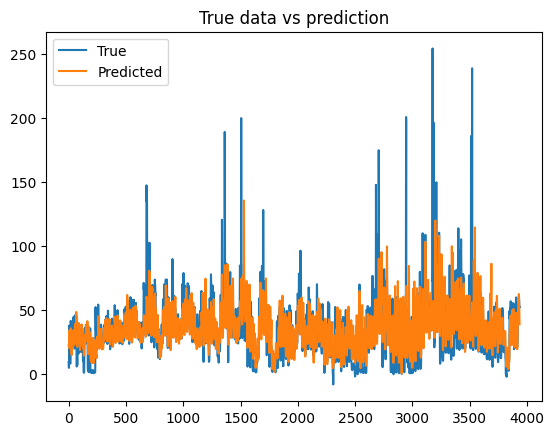

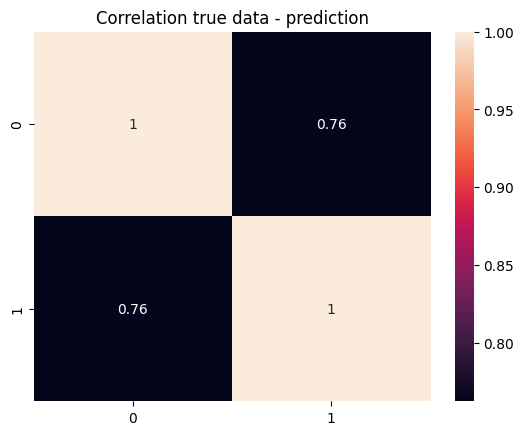

	r^2=0.570926
Mean Absolute Error (MAE): 9.776969547122683
Mean Squared Error (MSE): 232.78696155964062
Root Mean Squared Error (RMSE): 15.257357620493813
Mean Absolute Percentage Error (MAPE): 127.14
Accuracy: -27.14
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-03 23:00:00, test 2021-06-04 00:00:00 - 2021-06-30 23:00:00


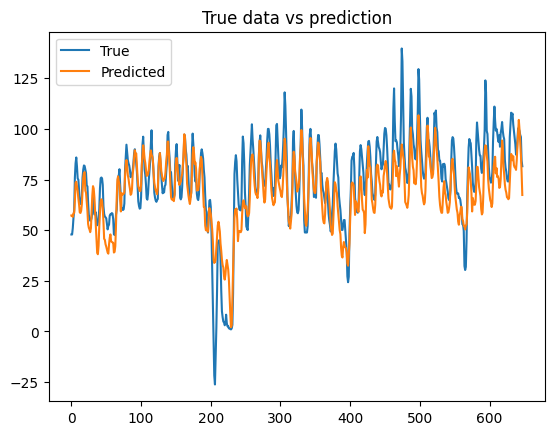

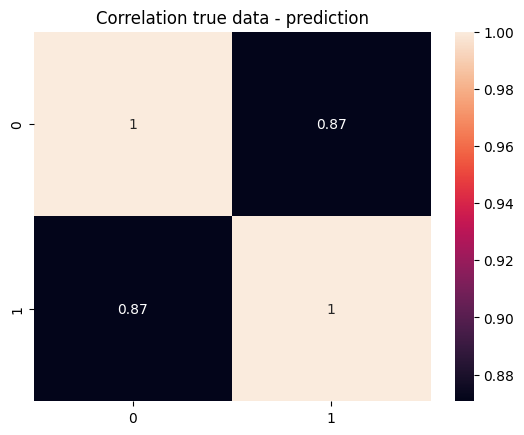

	r^2=0.663238
Mean Absolute Error (MAE): 10.307542615387202
Mean Squared Error (MSE): 165.01143096662202
Root Mean Squared Error (RMSE): 12.845677520731323
Mean Absolute Percentage Error (MAPE): 36.85
Accuracy: 63.15
Iteration  2
train 2021-07-01 00:00:00 - 2022-12-31 23:00:00, test 2023-01-01 00:00:00 - 2023-04-07 23:00:00


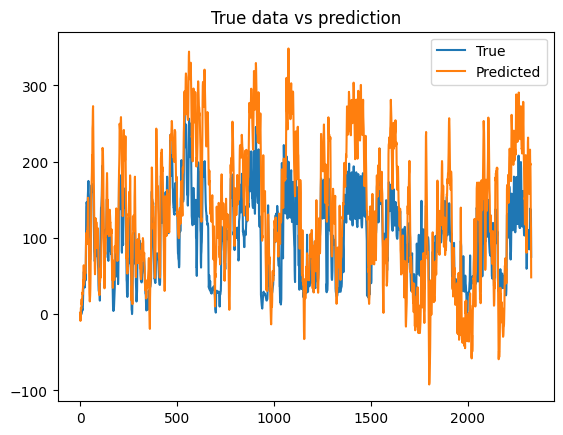

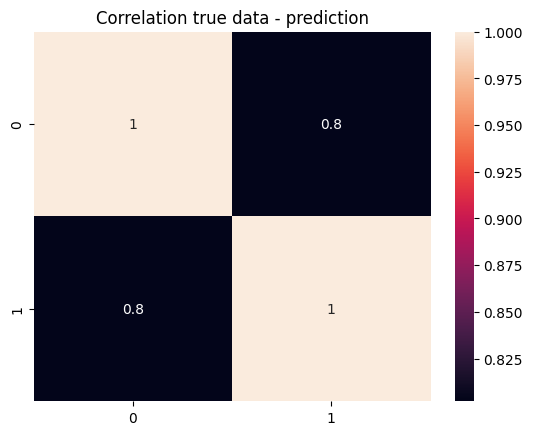

	r^2=-0.619859
Mean Absolute Error (MAE): 54.28226803486228
Mean Squared Error (MSE): 4386.1232729097455
Root Mean Squared Error (RMSE): 66.22781343899061
Mean Absolute Percentage Error (MAPE): 121.5
Accuracy: -21.5


In [19]:
lr_pred_0, lr_model_0 = run_model('lr', df_lag, k_folds, split_method,
                                         train_start, features, target, cols_std)

### Moving average

In [ ]:
# df_ma_0 = run_model('ma', df_lag, k_folds, split_method,
#                                          train_start, features, target, cols_std, pred_window = 24*1)

# df_ma_0.dropna(how = 'any', axis = 0, inplace = True)
# df_ma_0.drop(df_ma_0[df_ma_0[target] == 0].index, inplace = True)

In [ ]:
ytrue = np.array(df_ma_0[target]).ravel()
ypred = np.array(df_ma_0['pred']).ravel()

In [ ]:
model_evaluation(ytrue, ypred)

### Random Forest

In [ ]:
rf_pred_0, rf_models_0 = run_model('rf', df_lag, k_folds, split_method, train_start, features, target, cols_std)

### XGBoost

Iteration  0
train 2018-01-01 00:00:00 - 2020-07-20 23:00:00, test 2020-07-21 00:00:00 - 2020-12-31 23:00:00


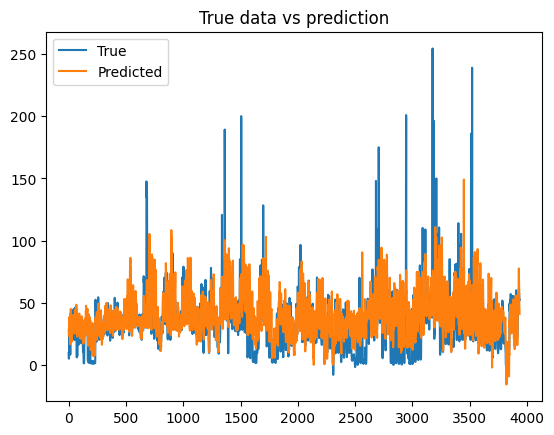

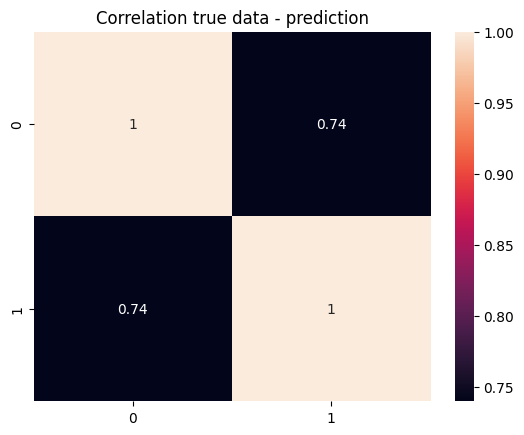

	r^2=0.510789
Mean Absolute Error (MAE): 10.971637993013465
Mean Squared Error (MSE): 265.41321806974383
Root Mean Squared Error (RMSE): 16.2915075444154
Mean Absolute Percentage Error (MAPE): 191.99
Accuracy: -91.99
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-03 23:00:00, test 2021-06-04 00:00:00 - 2021-06-30 23:00:00


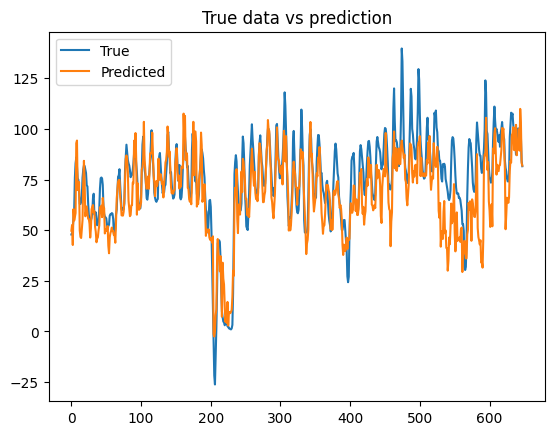

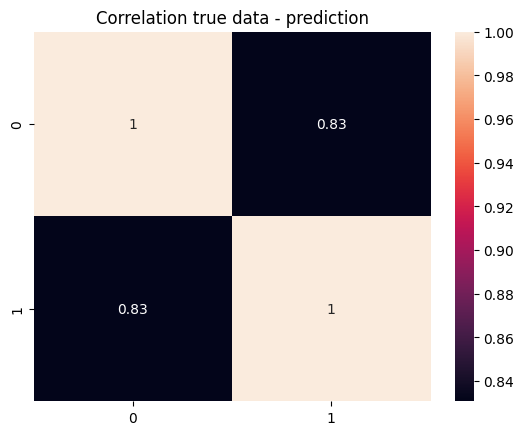

	r^2=0.573528
Mean Absolute Error (MAE): 10.9066031791141
Mean Squared Error (MSE): 208.9686269987028
Root Mean Squared Error (RMSE): 14.45574719613977
Mean Absolute Percentage Error (MAPE): 24.6
Accuracy: 75.4
Iteration  2
train 2021-07-01 00:00:00 - 2022-12-31 23:00:00, test 2023-01-01 00:00:00 - 2023-04-07 23:00:00


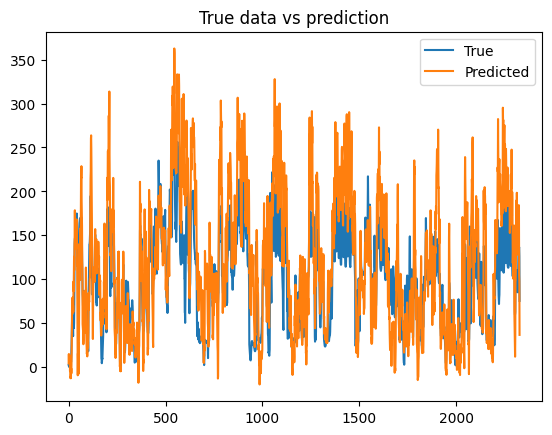

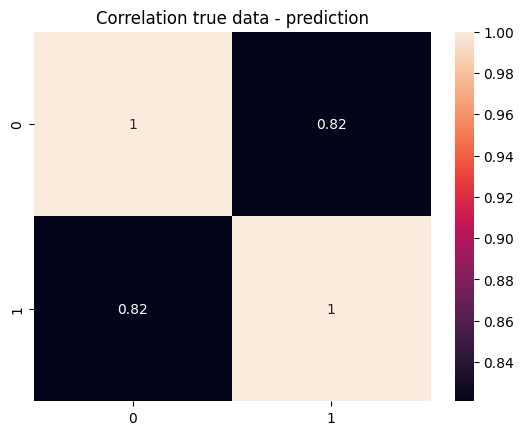

	r^2=0.072235
Mean Absolute Error (MAE): 39.14815342717484
Mean Squared Error (MSE): 2512.1272599089575
Root Mean Squared Error (RMSE): 50.121125884291125
Mean Absolute Percentage Error (MAPE): 84.78
Accuracy: 15.22


In [20]:
xgb_pred_0, xgb_models_0 = run_model('xgb', df_lag, k_folds, split_method, train_start, features, target, cols_std,'short_term')

### Gradient Boost

In [21]:
gb_0 = run_model('gb', df_lag, k_folds, split_method, train_start, features, target, cols_std)

Iteration  0
train 2018-01-01 00:00:00 - 2020-07-20 23:00:00, test 2020-07-21 00:00:00 - 2020-12-31 23:00:00


### LSTM

In [ ]:
lstm_0 = run_model('lstm', df_lag, k_folds, split_method, train_start, features, target, cols_std)

## Split - Method = 1
The approach is to split the data in increasing blocks. The size of the train set increases, whereas the size of the test remains 3 months.

In [ ]:
split_method = 1

### Baseline

In [ ]:
lr_pred_1, lr_model_1 = run_model('lr', df_lag, k_folds, split_method,
                                         train_start, features, target, cols_std)

### Random forest

In [ ]:
rf_pred_1, rf_models_1 = run_model('rf', df_lag, k_folds, split_method, train_start, features, target, cols_std, 'short_term')

### XGBoost

In [ ]:
xgb_pred_1, xgb_models_1 = run_model('xgb', df_lag, k_folds, split_method, train_start, features, target, cols_std)

### Gradient Boost

### LSTM

In [ ]:
lstm_1 = run_model('lstm', df_lag, k_folds, split_method, train_start, features, target, cols_std)

#### NOTES FRANCISCO/FREDERIK 14/04<br>
correlation between ytrue and ypred, RMSE can be hard to refrence.<br>
use power transform instead of log (how?)